This assignment serves three purposes:

--> Introducing you to RandomForestClassifier
--> Trying to implement Dense CNN model using the skills you gained till now

This assingemnt might not contain a line to line explaination of the task to be performed. You got to start visiting the documentations or any example online to help you out with queries like syntax and parameters.

The third and the most crucial purpose of all is helping you understand how to implement different models for the same task.
Here, we have given you the task of hand-written digit classification on MNIST dataset, first using RandomForestClassifier and second using Dense CNN and if you wish, you could also try to implement this task from the model of previous assingment with of-course a little bit of tweaking. 

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
from scipy.io import loadmat
# set path of dataset to mnist_path varaible and loadmat() it to mnist_raw

mnist_raw=loadmat("mnist-original")

mnist ={ "data":mnist_raw["data"].T,"target":mnist_raw["label"][0],
         "COL_NAMES":["label","data"],"DESCR": "mldata.org dataset:mnist-original",
       }

In [3]:
# store data in X and target in y
X=mnist["data"]
y=mnist["target"]


#Our data is expected to has 70000 instances(rows) and 784 features(columns)

print("Shape of X:"+str(X.shape))
print("Shape of Y:"+str(y.shape))

Shape of X:(70000, 784)
Shape of Y:(70000,)


In [4]:
#import matplotlib 
import matplotlib.pyplot as plt


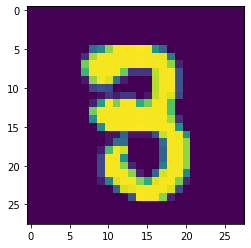

In [5]:
# pick any example from z, rehshape it to 28x28 type and display it using matplot
rndm=np.random.choice(range(y.shape[0]),1)
plt.imshow(X[rndm].reshape(28,28))


In [ ]:
# To randomize out data set we have to shuffle it
#np.random.permutation() gives us an np.array of numbers in range given range
#  reshuffle X and y




In [6]:
# we are dividing the data in 60,000 and 10,000 for training and testing
X_train=X[:60000]
X_test=X[60000:]
y_train=y[:60000]
y_test=y[60000:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [8]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

#create a rondom forest classifier with random state of 42 and fit your train varaibles 

model=RandomForestClassifier(random_state=42);
model.fit(X_train,y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [9]:
from sklearn.metrics import accuracy_score
# predict your train X varariable and find mean_absolute error it should be around 0.00333
y_pred=model.predict(X_train)
err=mean_absolute_error(y_train,y_pred)
print("MAE in Train set ",err)
print("Accuracy in Train set ",accuracy_score(y_train,y_pred))
# repeat the same for test X it should be around 0.205
y_pred=model.predict(X_test)
err=mean_absolute_error(y_test,y_pred)
print("MAE in test set ",err)
print("Accuracy in Test set ",accuracy_score(y_test,y_pred))

MAE in Train set  0.0
Accuracy in Train set  1.0
MAE in test set  0.1185
Accuracy in Test set  0.9688


In [ ]:
# Now that RandonForest has been explored, we'll be implementing Dense CNN model

In [10]:
# First order of business is creating the model
# for that purpose we've already imported the required things 
# your task is to use the above imported modules and whatever skills you have harnessed and build a model from scratch
# JUST A REMINDER , WE TRIED TO INTRODUCE YOU ALL WITH MOST OF THE LIBRARIES WHICH WE USE ON A DAILY BASIS
# ONE OF THEM IS KERAS USING WHICH YOU'LL IMPLEMENT THIS LAST ASSINGMENT 
# BUT DON'T WORRY THAT ITS NEW. THE CONCEPTS WHICH YOU ALL HAVE GAINED UPTIL NOW WILL ONLY BE USED 
# DON'T PANIC THAT YOU DON'T KNOW KERAS
# JUST GIVE IT A TRY. CREATING A MODEL IS SIMILAR TO THAT IN PYTORCH.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D, MaxPooling2D, Flatten

# keras initializer
X1_train=X_train.reshape(60000,28,28)
X1_test=X_test.reshape(10000,28,28)

In [11]:
# model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

In [12]:
# after creating the model compile it with proper optimizer and loss function 
# You can refer to any keras model training for your reference 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [13]:
# Fit your train datasets
model.fit(X1_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 244us/sample - loss: 2.4160 - accuracy: 0.8565
Epoch 2/10
60000/60000 [==============================] - 10s 173us/sample - loss: 0.3941 - accuracy: 0.9084
Epoch 3/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2882 - accuracy: 0.9272
Epoch 4/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.2480 - accuracy: 0.9374
Epoch 5/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2207 - accuracy: 0.9452
Epoch 6/10
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2200 - accuracy: 0.9469
Epoch 7/10
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2025 - accuracy: 0.9510
Epoch 8/10
60000/60000 [==============================] - 11s 182us/sample - loss: 0.1904 - accuracy: 0.9528
Epoch 9/10
60000/60000 [==============================] - 11s 185us/sample - loss: 0.1899 - accuracy: 0.9

In [14]:
# After fitting try your model with test dataset
# see the accuracy
test_loss, test_acc = model.evaluate(X1_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

10000/10000 - 1s - loss: 0.2638 - accuracy: 0.9508

Test accuracy: 0.9508

Test loss: 0.2637669875119915


In [17]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.fit(X1_train.reshape(60000,28,28,1), y_train,epochs=15, batch_size=64)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 232s 4ms/sample - loss: 0.2905 - accuracy: 0.9379
Epoch 2/15
60000/60000 [==============================] - 225s 4ms/sample - loss: 0.0575 - accuracy: 0.9823
Epoch 3/15
60000/60000 [==============================] - 215s 4ms/sample - loss: 0.0438 - accuracy: 0.9867
Epoch 4/15
60000/60000 [==============================] - 218s 4ms/sample - loss: 0.0359 - accuracy: 0.9886
Epoch 5/15
60000/60000 [==============================] - 236s 4ms/sample - loss: 0.0323 - accuracy: 0.9898
Epoch 6/15
60000/60000 [==============================] - 263s 4ms/sample - loss: 0.0297 - accuracy: 0.9907
Epoch 7/15
60000/60000 [==============================] - 229s 4ms/sample - loss: 0.0285 - accuracy: 0.9906
Epoch 8/15
60000/60000 [==============================] - 229s 4ms/sample - loss: 0.0233 - accuracy: 0.9928
Epoch 9/15
60000/60000 [==============================] - 213s 4ms/sample - loss: 0.0233 - accuracy: 0.9924
Epoch

In [23]:
test_loss, test_acc = model.evaluate(X1_test.reshape(10000,28,28,1),  y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

10000/10000 - 15s - loss: 0.0537 - accuracy: 0.9896

Test accuracy: 0.9896

Test loss: 0.053672715060734365


In [ ]:
# Understand how and where to use which model and jot down your observations in a text file in the github repository.